In [ ]:
import pandas as pd
import numpy as np
# Correct Google Sheets URL
url = "https://docs.google.com/spreadsheets/d/1MTG5u8Yd22dUuxWkbGHDaARjiC7hn6unY7iVMeJOsU8/export?format=csv&gid=687253521"

# Load data
df = pd.read_csv(url)

# Display data
df.head(7)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/10 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/10 8:26,4.25,17850.0,United Kingdom


In [ ]:
df=df[df['Quantity']>=0]
df=df[df['UnitPrice']>0]

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,530104.000000,530104.000000,397884.000000
mean,10.542037,3.907625,15294.423453
std,155.524124,35.915681,1713.141560
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


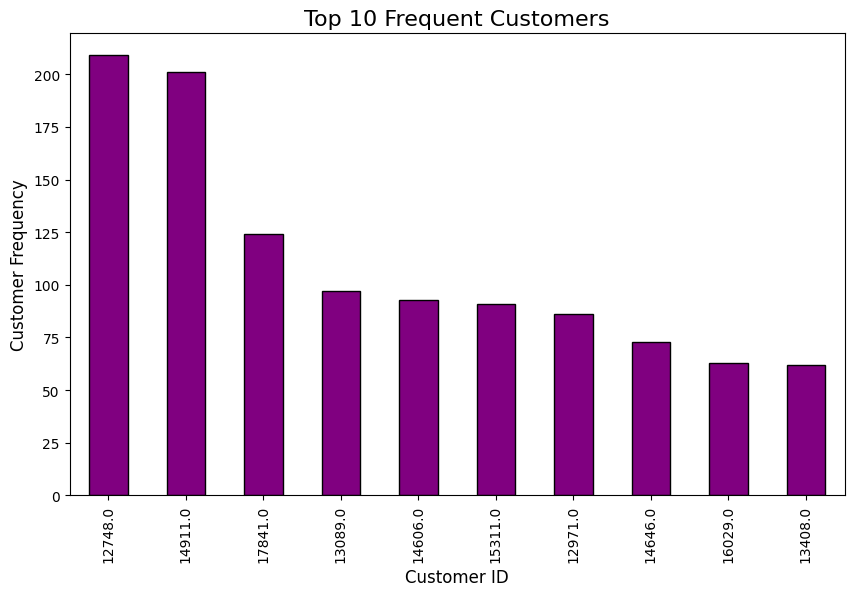

In [ ]:
import matplotlib.pyplot as plt
customer_frequency = df.groupby('CustomerID')['InvoiceNo'].nunique()

#frequency of purchases in descending order
sorted_customer_frequency = customer_frequency.sort_values(ascending=False)
#the ones with the highest frequency

plt.figure(figsize=(10, 6))
plt.title('Top 10 Frequent Customers', fontsize=16)
sorted_customer_frequency.head(10).plot(kind='bar',color='purple', edgecolor='black')
plt.xlabel('Customer ID', fontsize=12)
plt.ylabel('Customer Frequency', fontsize=12)
plt.show()



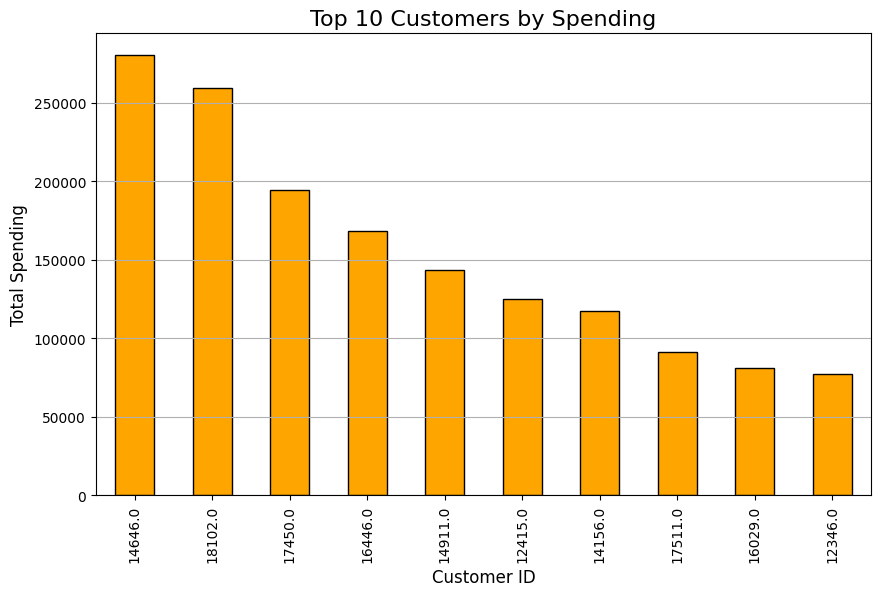

In [ ]:
#Customer Segmentation
df['TotalPrice'] = df['UnitPrice']*df['Quantity']
customer_spending = df.groupby('CustomerID')['TotalPrice'].sum()

# Ploting top 10 customers by spending
top_customers = customer_spending.sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Top 10 Customers by Spending', fontsize=16)
plt.xlabel('Customer ID', fontsize=12)
plt.ylabel('Total Spending', fontsize=12)
plt.grid(axis='y')
plt.show()


<ipython-input-4-286af31fa23a>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


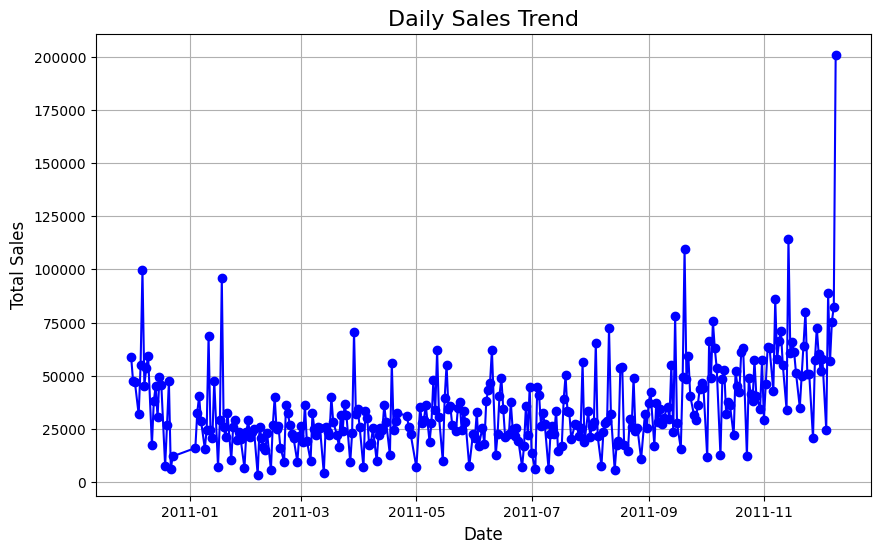

In [ ]:
#Sales trend over time

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Grouping by date and sum the TotalPrice
daily_sales = df.groupby(df['InvoiceDate'].dt.date)['TotalPrice'].sum()


plt.figure(figsize=(10, 6))
daily_sales.plot(kind='line', color='blue', marker='o')
plt.title('Daily Sales Trend', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid()
plt.show()


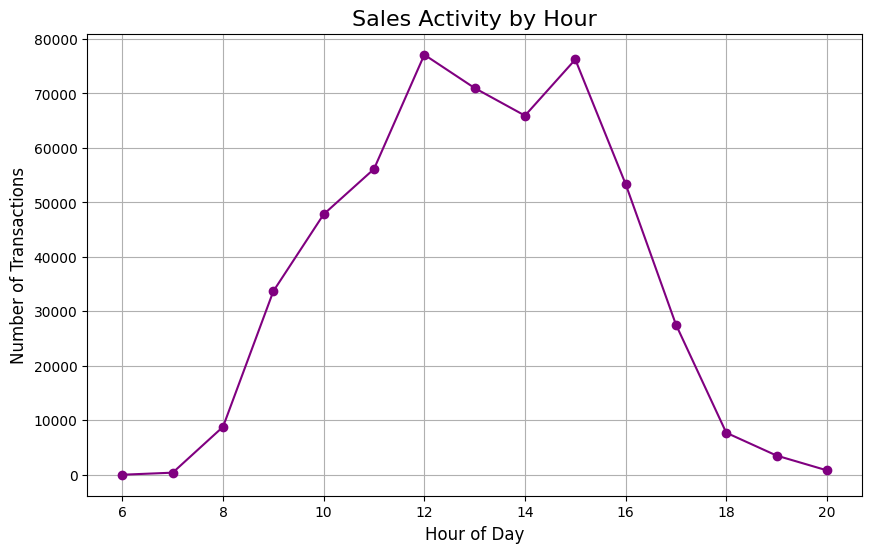

In [ ]:
#Sales Distribution by Hour of the Day
df['Hour'] = df['InvoiceDate'].dt.hour

hourly_sales = df.groupby('Hour')['InvoiceNo'].count()

# Plot hourly sales
plt.figure(figsize=(10, 6))
hourly_sales.plot(kind='line', color='purple', marker='o')
plt.title('Sales Activity by Hour', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.grid()
plt.show()


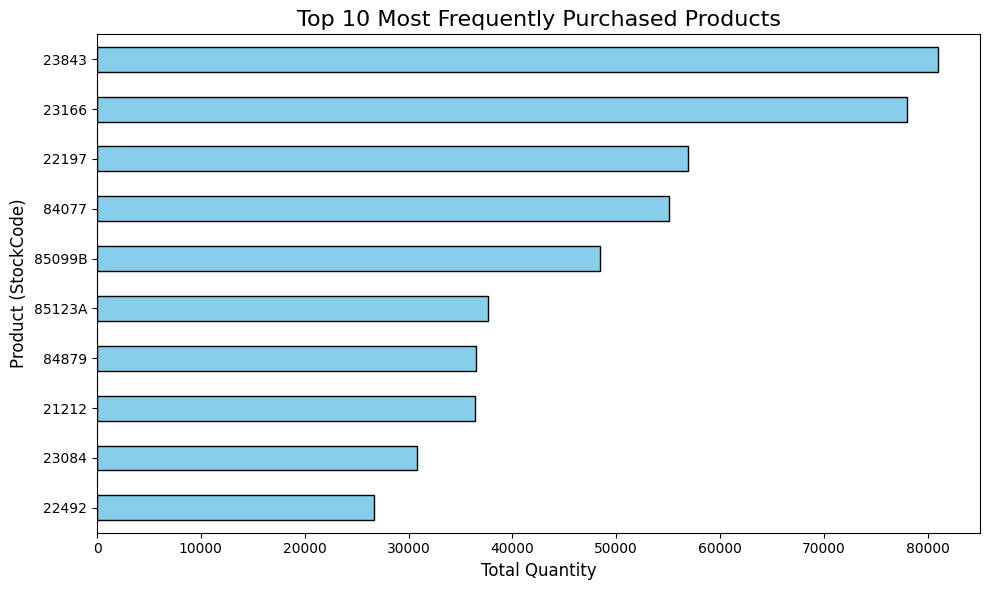

In [ ]:

top_products = df.groupby('StockCode')['Quantity'].sum()

# Sorting the products by quantity in descending order
top_products_sorted = top_products.sort_values(ascending=False)

# Displaying the top 10 most frequently purchased products
top_10_products = top_products_sorted.head(10)


plt.figure(figsize=(10, 6))
top_10_products.plot(kind='barh', color='skyblue', edgecolor='black')

plt.title('Top 10 Most Frequently Purchased Products', fontsize=16)
plt.xlabel('Total Quantity', fontsize=12)
plt.ylabel('Product (StockCode)', fontsize=12)
plt.gca().invert_yaxis()  # To display the highest value at the top

# Show the plot
plt.tight_layout()
plt.show()

## EDA FOR TSA

In [ ]:
df.index = pd.to_datetime(df['InvoiceDate'])


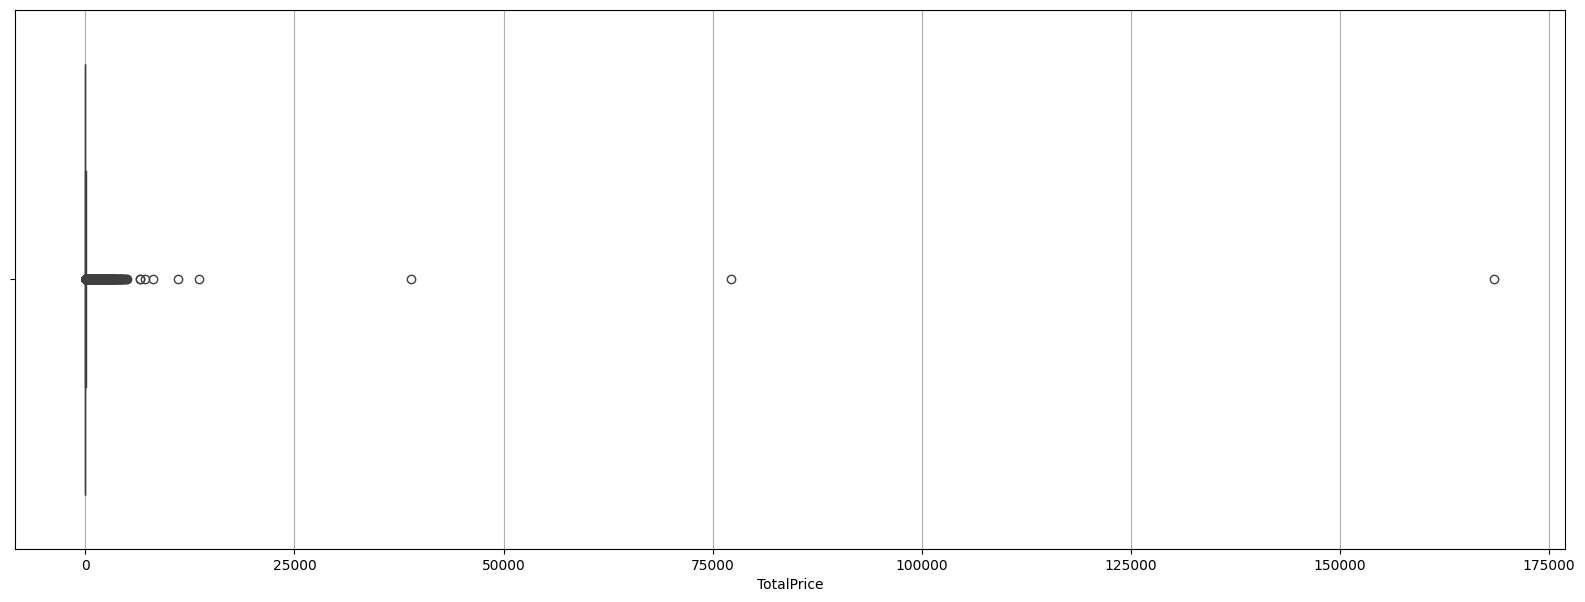

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,7))
plt.grid()
sns.boxplot(x='TotalPrice', data=df)

plt.show()

In [ ]:
upper_bound = df['TotalPrice'].quantile(0.95)

df_cleaned = df[(df['TotalPrice'] <= upper_bound)]


In [ ]:
df_resample=df_cleaned.resample('W').mean(numeric_only =True)
df_resample=df_resample.dropna()
df_cleaned=df_cleaned.resample('D').mean(numeric_only =True)
df_cleaned=df_cleaned.dropna()
df_resample.rename(columns={'TotalPrice': 'rolling TotalPrice'}, inplace=True)

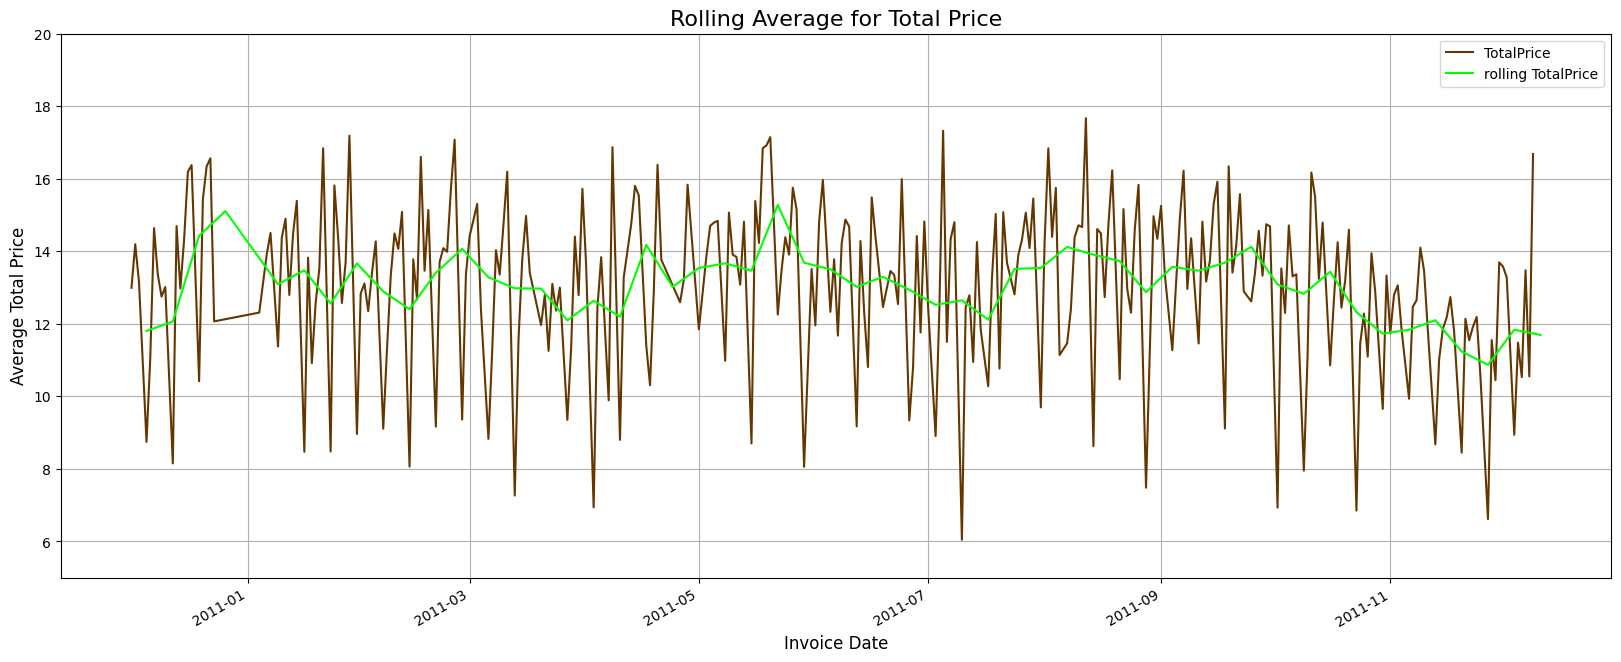

In [ ]:
df_cleaned['TotalPrice'].plot(figsize=(0,8),color='#653700',legend=True)
df_resample['rolling TotalPrice'].plot(figsize=(20,8),color='lime',legend='Yess')
plt.grid()
plt.title('Rolling Average for Total Price', fontsize=16)
plt.xlabel('Invoice Date', fontsize=12)
plt.ylabel('Average Total Price', fontsize=12)
plt.ylim(5,20)
# plt.tight_layout()
plt.show()

In [ ]:
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Hour
InvoiceDate,,,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,8
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,8
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,8
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,8
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,8


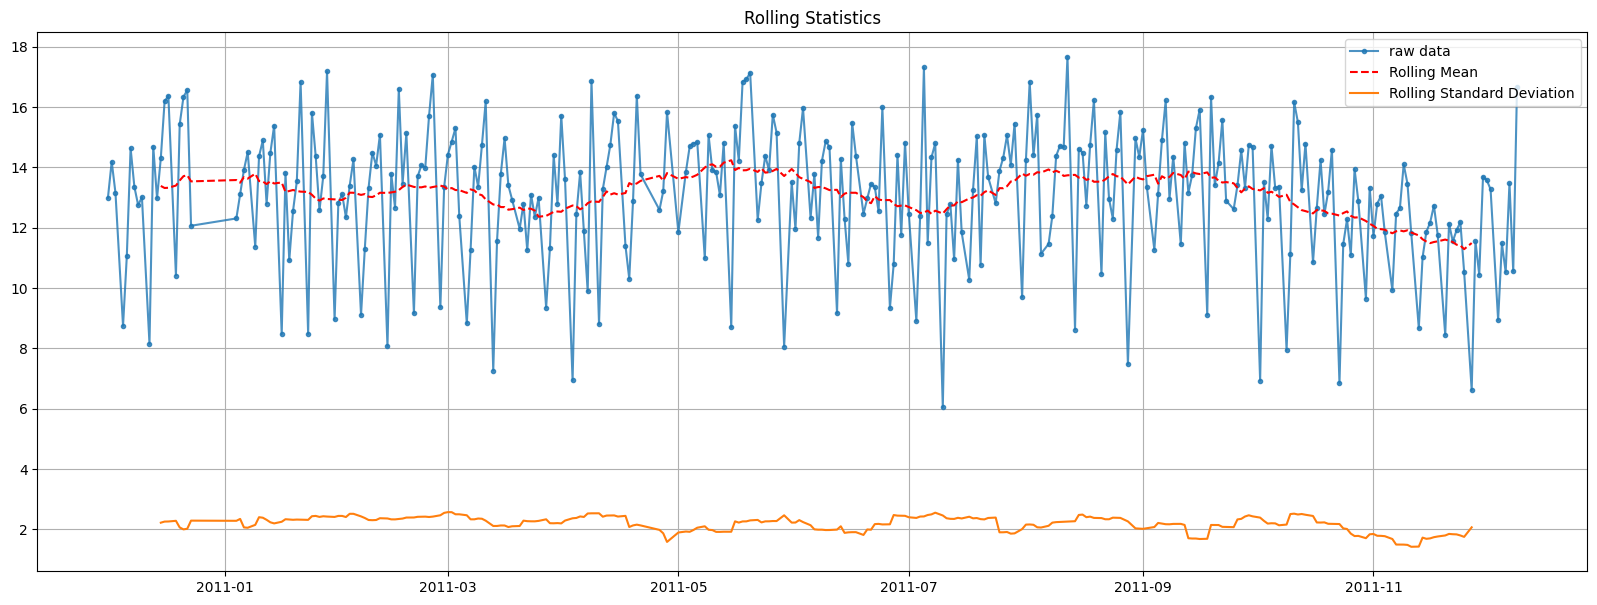

In [ ]:
# Checking for stationarity
stationary_data = pd.DataFrame(df_cleaned.resample('D').mean(numeric_only =True))
stationary_data = stationary_data.dropna()

def test_stationarity(timeseries, title):

    # calculating rolling statistics.
    roll_mean = timeseries['TotalPrice'].rolling(window = 24,  center=True).mean()
    roll_std = timeseries['TotalPrice'].rolling(window = 24,  center=True).std()

    # plotting rolling statistics with orignal data.
    plt.figure(figsize=(20, 7), dpi=100)
    plt.plot(timeseries['TotalPrice'], label= title, marker=".", alpha=0.8)
    plt.plot(roll_mean, label="Rolling Mean", color="red", linestyle="--")
    plt.plot(roll_std, label="Rolling Standard Deviation")
    plt.title("Rolling Statistics")
    #plt.yticks(np.arange(0,20, 1))
    plt.grid()
    plt.legend()
    plt.show()

test_stationarity(stationary_data, 'raw data')

In [ ]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df_resample['rolling TotalPrice'].dropna(), autolag='AIC')
print('Test statistic = {:.3f}'.format(dftest[0]))
print('P-value = {:.3f}'.format(dftest[1]))
print('Critical values :')
for k, v in dftest[4].items():
    print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))

Test statistic = -3.080
P-value = 0.028
Critical values :
	1%: -3.453102162983312 - The data is not stationary with 99% confidence
	5%: -2.871558538275452 - The data is  stationary with 95% confidence
	10%: -2.5721082282996433 - The data is  stationary with 90% confidence


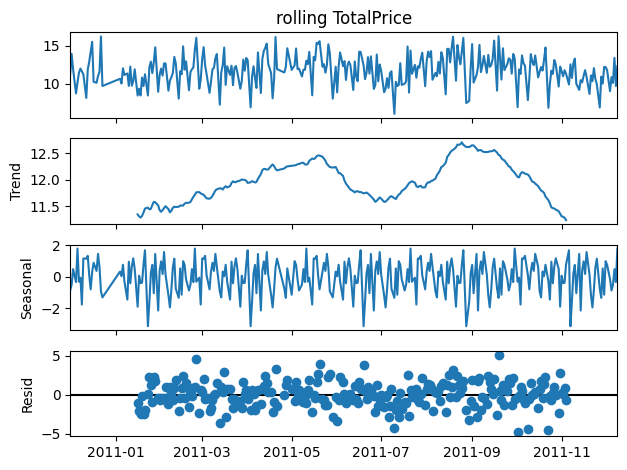

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
df_cleaned=df_cleaned.dropna()
# Taking 1 year as period
decompose_result = seasonal_decompose((df_resample['rolling TotalPrice']),period=60)
decompose_result.plot()
plt.show()

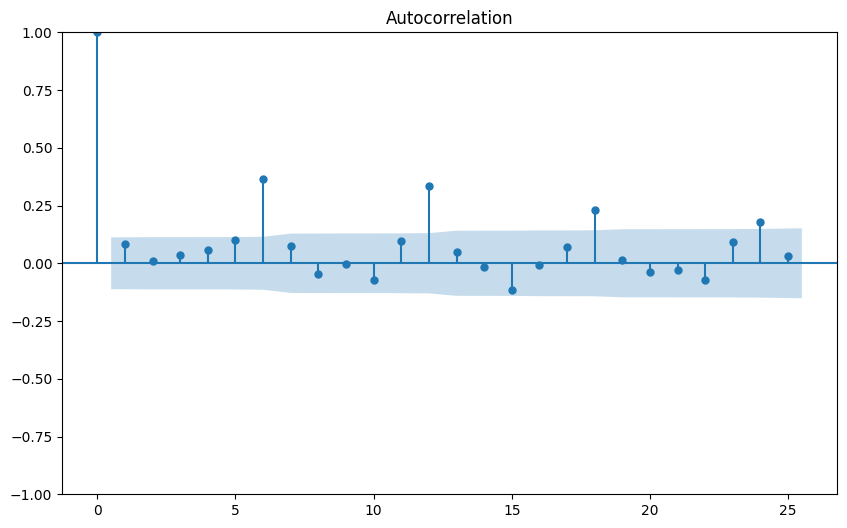

In [ ]:
import matplotlib as mpl
with mpl.rc_context():
    mpl.rc("figure", figsize=(10,6))
    plot_acf(df_resample['rolling TotalPrice']);

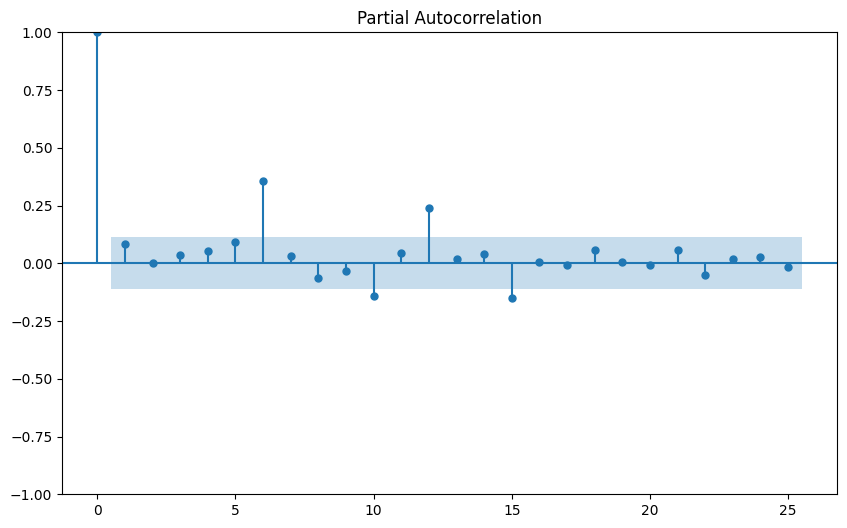

In [ ]:
with mpl.rc_context():
    mpl.rc("figure", figsize=(10,6))
    plot_pacf(df_resample['rolling TotalPrice']);

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, median_absolute_error

In [ ]:
train_size = int(len(df_resample) * 0.8)
train, test = df_resample[:train_size], df_resample[train_size:]

In [ ]:

model = SARIMAX(
    train['rolling TotalPrice'],  # Target variable
    exog=train[['Quantity']],
    order=(1, 0, 2),
    seasonal_order=(1, 0, 1, 90)
)
sarimax_model = model.fit(disp=False)
pred_start = len(train)  # Start from the end of the training set
pred_end = len(train) + len(test) - 1  # End of the test set

predictions = sarimax_model.predict(
    start=pred_start,
    end=pred_end,
    exog=test[['Quantity']]
)

# Actual and predicted values
y_true = test['rolling TotalPrice']
y_pred = predictions
y_true=np.array(y_true)
y_pred=np.array(y_pred)

#Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100


# Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Root Mean Square Percentage Error (RMSPE)
rmspe = np.sqrt(np.mean(np.square((y_true - y_pred) / y_true))) * 100

# Max Error
max_err = max_error(y_true, y_pred)

# Median Absolute Error (for reference; you mentioned it’s 2.129)
median_err = median_absolute_error(y_true, y_pred)


print('---------------------------------')

# Print all errors
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Root Mean Square Percentage Error (RMSPE): {rmspe}%")
print(f"Max Error: {max_err}")
print(f"Median Error: {median_err}")



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization

---------------------------------
Mean Absolute Error (MAE): 0.7479108157402261
Mean Absolute Percentage Error (MAPE): 7.170927730817153%
Mean Squared Error (MSE): 0.8685996148561245
Root Mean Squared Error (RMSE): 0.9319869177494523
Root Mean Square Percentage Error (RMSPE): 9.705733582781688%
Max Error: 2.5407067301040183
Median Error: 0.629029854328202


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Arima Model

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.1 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima

# Find optimal parameters
auto_arima_model = auto_arima(df_resample['rolling TotalPrice'], seasonal=False, trace=True, suppress_warnings=True)
print(auto_arima_model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1289.641, Time=3.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2382.047, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1470.033, Time=0.15 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2085.776, Time=0.96 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1289.229, Time=2.73 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1890.424, Time=0.39 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1287.229, Time=1.40 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1289.229, Time=1.58 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.95 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1286.819, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1284.833, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1284.911, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1286.829, Time=0.49 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1284.822, Time=0.18 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

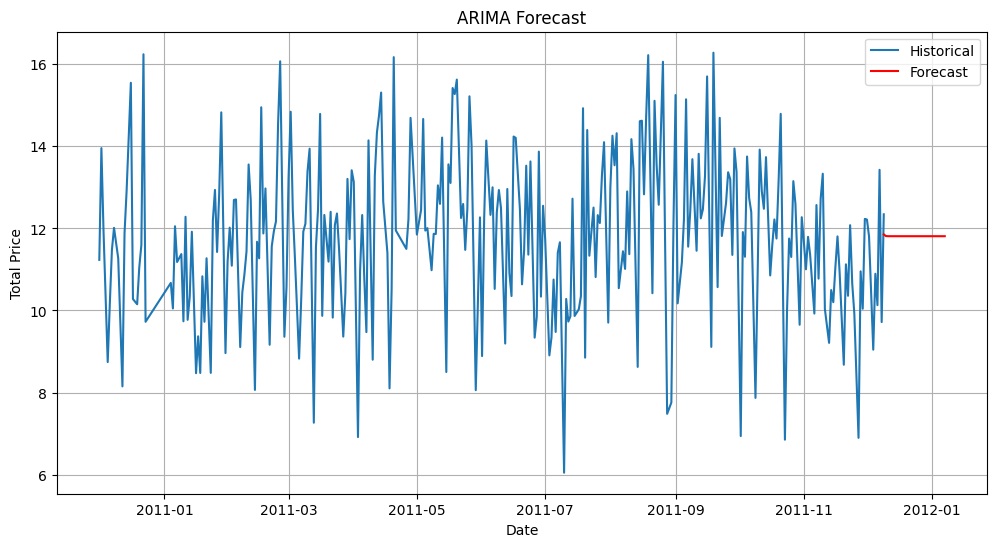

In [ ]:
# Fit the ARIMA model with the best parameters
from statsmodels.tsa.arima.model import ARIMA

# Refit ARIMA(1,0,0) with an intercept
best_model = ARIMA(df_resample['rolling TotalPrice'], order=(1, 0, 0)).fit()

# Forecast the next 30 days
forecast_steps = 30
forecast = best_model.forecast(steps=forecast_steps)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(df_resample.index, df_resample['rolling TotalPrice'], label='Historical')
plt.plot(pd.date_range(df_resample.index[-1], periods=forecast_steps, freq='D'), forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Total Price')
plt.legend()
plt.grid()
plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, median_absolute_error
import numpy as np

# Train-test split
train_size = int(len(df_resample) * 0.8)
train, test = df_resample[:train_size], df_resample[train_size:]

# Fit ARIMA model (using the best order from auto_arima or your selected parameters)
arima_model = ARIMA(train['rolling TotalPrice'], order=(1, 0, 0)).fit()

# Forecast the test set
predictions = arima_model.predict(start=len(train), end=len(train) + len(test) - 1)

# Actual and predicted values
y_true = np.array(test['rolling TotalPrice'])
y_pred = np.array(predictions)

# Metrics Calculation

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Root Mean Square Percentage Error (RMSPE)
rmspe = np.sqrt(np.mean(np.square((y_true - y_pred) / y_true))) * 100

# Max Error
max_err = max_error(y_true, y_pred)

# Median Absolute Error
median_err = median_absolute_error(y_true, y_pred)

# Print Results
print('---------------------------------')
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Root Mean Square Percentage Error (RMSPE): {rmspe}%")
print(f"Max Error: {max_err}")
print(f"Median Error: {median_err}")


---------------------------------
Mean Absolute Error (MAE): 1.3822891009936102
Mean Absolute Percentage Error (MAPE): 14.194772611782167%
Mean Squared Error (MSE): 3.344469878691267
Root Mean Squared Error (RMSE): 1.828789183774682
Root Mean Square Percentage Error (RMSPE): 21.771462683793512%
Max Error: 5.095564297979485
Median Error: 1.0921390464871497


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

### Analysis of Results

Comparing the **SARIMAX** and **ARIMA** results, it's clear that the SARIMAX model outperforms ARIMA across all evaluation metrics:

| Metric                       | SARIMAX            | ARIMA              | Difference (Better = ↓) |
|------------------------------|--------------------|--------------------|-------------------------|
| **Mean Absolute Error (MAE)** | **0.7465**         | 1.3823             | SARIMAX (↓0.6358)      |
| **Mean Absolute Percentage Error (MAPE)** | **7.16%**           | 14.19%             | SARIMAX (↓7.03%)       |
| **Mean Squared Error (MSE)**  | **0.8692**         | 3.3445             | SARIMAX (↓2.4753)      |
| **Root Mean Squared Error (RMSE)** | **0.9323**         | 1.8288             | SARIMAX (↓0.8965)      |
| **Root Mean Square Percentage Error (RMSPE)** | **9.71%**           | 21.77%             | SARIMAX (↓12.06%)      |
| **Max Error**                 | **2.5482**         | 5.0956             | SARIMAX (↓2.5474)      |
| **Median Error**              | **0.6332**         | 1.0921             | SARIMAX (↓0.4589)      |

### Observations:
1. **SARIMAX is Better for this Dataset:**
   - **MAPE and RMSPE:** SARIMAX achieves much lower percentage errors, suggesting more accurate predictions relative to actual values.
   - **MAE and RMSE:** SARIMAX's lower absolute and root mean squared errors confirm its superior overall performance.
   - **Max and Median Errors:** SARIMAX handles extreme cases better, resulting in lower peak and typical deviations.

2. **Impact of Exogenous Variable in SARIMAX:**
   - The inclusion of `Quantity` as an exogenous variable improves SARIMAX's predictions compared to ARIMA, which lacks this contextual information.

3. **ARIMA's Performance:**
   - ARIMA struggles to match SARIMAX, possibly due to ignoring seasonal components or exogenous variables.

### Recommendations:
1. **Choose SARIMAX** for forecasting as it provides better accuracy and reliability for this dataset.
2. **Further Improvements to SARIMAX:**
   - Experiment with other exogenous variables if available (e.g., promotional activities, external factors).
   - Fine-tune `seasonal_order` to see if additional improvements are possible.
3. ARIMA Usage: Reserve ARIMA for datasets without significant seasonality or exogenous factors.

**Checking if Non-UK transactions form a statistically significant proportion of total transactions.**

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import norm

# Filter transactions not from the United Kingdom
df_non_uk = df[df['Country'] != 'United Kingdom']

# Total number of transactions
n = len(df)

# Number of non-UK transactions
non_uk_transactions = len(df_non_uk)

# Proportion of non-UK transactions
p_hat = non_uk_transactions / n

# Null hypothesis proportion
p_0 = 0.05

# Check assumptions for using normal approximation
if n * p_0 < 10 or n * (1 - p_0) < 10:
    print("Warning: Sample size may be too small for normal approximation.")

# Standard error calculation for proportions
std_error = np.sqrt(p_0 * (1 - p_0) / n)

# Z-score calculation
z_score = (p_hat - p_0) / std_error
print(f"Z-score: {z_score}")

# P-value calculation (one-tailed test) using survival function
p_value = 1 - norm.cdf(z_score)


# Decision and output
if p_value < 0.05:
    print(f"Reject the null hypothesis (z={z_score:.2f}, p={p_value:.4e}). "
          f"Non-UK transactions are significantly greater than 5% of total transactions.")
else:
    print(f"Fail to reject the null hypothesis (z={z_score:.2f}, p={p_value:.4e}). "
          f"There is no significant evidence to suggest that non-UK transactions exceed 5%.")


Z-score: 116.43295156272613
Reject the null hypothesis (z=116.43, p=0.0000e+00). Non-UK transactions are significantly greater than 5% of total transactions.


In [ ]:
print(f"Total number of transactions: {n}")
print(f"Number of non-UK transactions: {non_uk_transactions}")
print(f"Proportion of non-UK transactions: {p_hat:.4f}")
print(f"Z-score: {z_score:.4f}")
print(f"P-value: {p_value:.10f}")

if p_value == 0:
    print("P-value is exactly zero. This suggests a very large effect size or a very large sample size.")


Total number of transactions: 530104
Number of non-UK transactions: 44981
Proportion of non-UK transactions: 0.0849
Z-score: 116.4330
P-value: 0.0000000000
P-value is exactly zero. This suggests a very large effect size or a very large sample size.


**Understand the results visually**

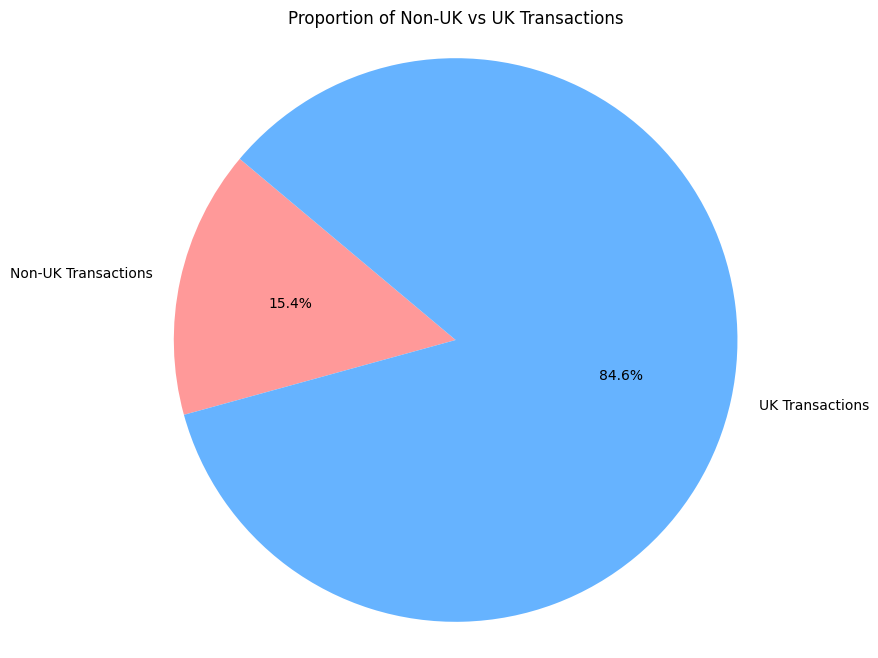

In [ ]:
import matplotlib.pyplot as plt


uk_transactions = df[df['Country'] == 'United Kingdom']
labels = ['Non-UK Transactions', 'UK Transactions']
sizes = [sum(df_non_uk['TotalPrice']), sum(uk_transactions['TotalPrice'])]
colors = ['#ff9999','#66b3ff']

# pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Proportion of Non-UK vs UK Transactions')
plt.axis('equal')
plt.show()


plot the proportion of non-UK transactions over time.

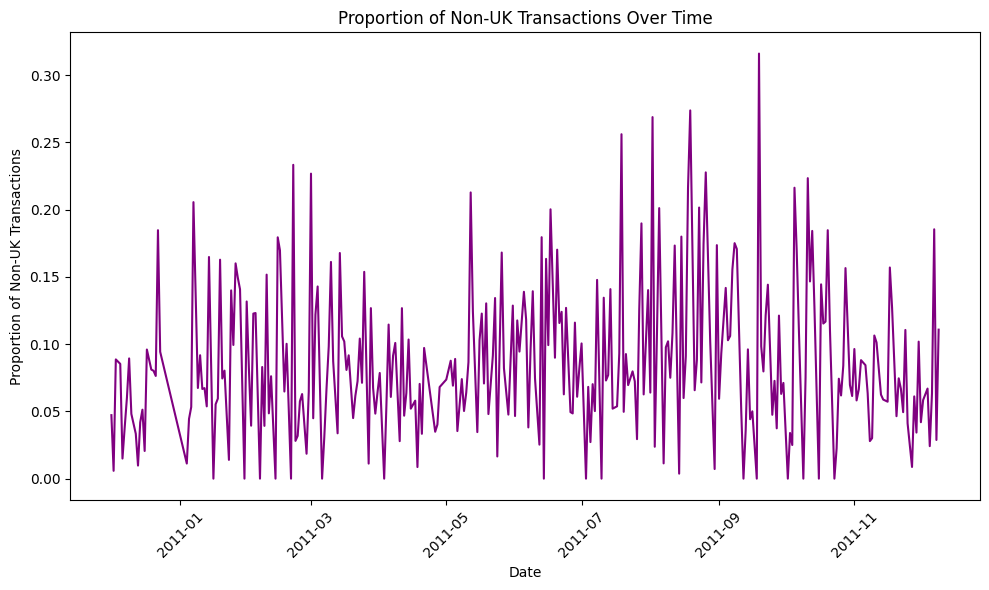

In [ ]:
df['Date'] = pd.to_datetime(df['InvoiceDate'])

df['is_non_uk'] = df['Country'] != 'United Kingdom'
daily_proportion = df.groupby(df['Date'].dt.date)['is_non_uk'].mean()

# Plotting the proportion over time
plt.figure(figsize=(10, 6))
daily_proportion.plot(kind='line', color='purple')
plt.title('Proportion of Non-UK Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Proportion of Non-UK Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We can visualize the confidence interval around the proportion of non-UK transactions:

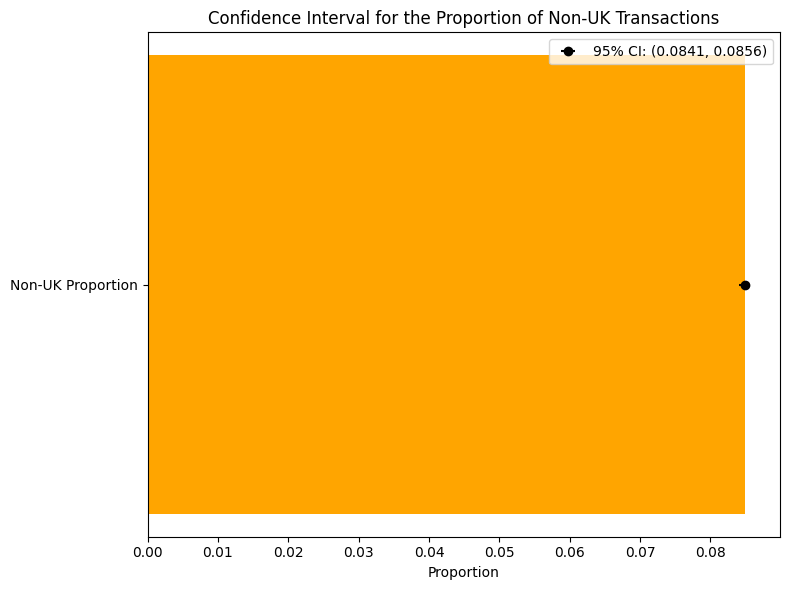

In [ ]:
import scipy.stats as stats

confidence_level = 0.95
z_critical = stats.norm.ppf(1 - (1 - confidence_level) / 2)

std_error = np.sqrt(p_hat * (1 - p_hat) / n)

margin_of_error = z_critical * std_error

conf_interval = (p_hat - margin_of_error, p_hat + margin_of_error)

# Plotting the confidence interval
plt.figure(figsize=(8, 6))
plt.barh(['Non-UK Proportion'], [p_hat], color='orange')
plt.errorbar(p_hat, 0, xerr=margin_of_error, fmt='o', color='black', label=f"95% CI: ({conf_interval[0]:.4f}, {conf_interval[1]:.4f})")
plt.title('Confidence Interval for the Proportion of Non-UK Transactions')
plt.xlabel('Proportion')
plt.legend()
plt.tight_layout()
plt.show()
